In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal
import soundfile as sf

In [5]:
def plot_spectral_components(y, sr):
    # FFT to transform speech signal to spectral domain
    D = np.fft.fft(y)

    # Plot the amplitude part of the spectral components
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D))
    plt.title('Spectral Components')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()

In [6]:
def plot_waveform(y, sr,title):
    """Plot the waveform of the audio signal."""
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [7]:
def apply_filter_and_listen(y, sr, filter_type):
    # FFT to transform speech signal to spectral domain
    D = np.fft.fft(y)
    if filter_type == 'rectangular':
        # Rectangular filter
        cutoff = 2000
        order = 101
        b = signal.firwin(order, cutoff, fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'bandpass':
        # Bandpass filter
        lowcut = 1000
        highcut = 4000
        order = 101
        b = signal.firwin(order, [lowcut, highcut], fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'highpass':
        # Highpass filter
        cutoff = 3000
        order = 100
        b = signal.firwin(order + 1, cutoff, fs=sr, pass_zero=False, scale=False)

    # Adjust the length of the filter coefficients to match the length of the spectral components
    b_padded = np.pad(b, (0, len(D) - len(b)), mode='constant')
    D_filtered = D * b_padded
    y_filtered = np.fft.ifft(D_filtered).real
    y_filtered /= np.max(np.abs(y_filtered))
    plot_waveform(y_filtered,sr,filter_type)
    sf.write(f"filtered_{filter_type}.wav", y_filtered, sr)

In [8]:
def apply_other_filters_and_listen(y, sr):
    # Apply Cosine filter
    b_cosine = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True, window='cosine')
    b_cosine_padded = np.pad(b_cosine, (0, len(y) - len(b_cosine)), mode='constant')
    D_cosine_filtered = np.fft.fft(y) * b_cosine_padded
    y_cosine_filtered = np.fft.ifft(D_cosine_filtered).real
    y_cosine_filtered /= np.max(np.abs(y_cosine_filtered))
    plot_waveform(y_cosine_filtered,sr,'y_cosine_filtered')
    sf.write("filtered_cosine.wav", y_cosine_filtered, sr)

    window = signal.gaussian(100, std=5)
    # Apply Gaussian Filters
    b_gaussian = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True)
    b_gaussian *= window
    b_gaussian_padded = np.pad(b_gaussian, (0, len(y) - len(b_gaussian)), mode='constant')
    D_gaussian_filtered = np.fft.fft(y) * b_gaussian_padded
    y_gaussian_filtered = np.fft.ifft(D_gaussian_filtered).real
    y_gaussian_filtered /= np.max(np.abs(y_gaussian_filtered))

    plot_waveform(y_gaussian_filtered,sr,"y_gaussian_filtered")
    sf.write("filtered_gaussian.wav", y_gaussian_filtered, sr)

In [10]:
y, sr = librosa.load(r"/content/adithya.wav")

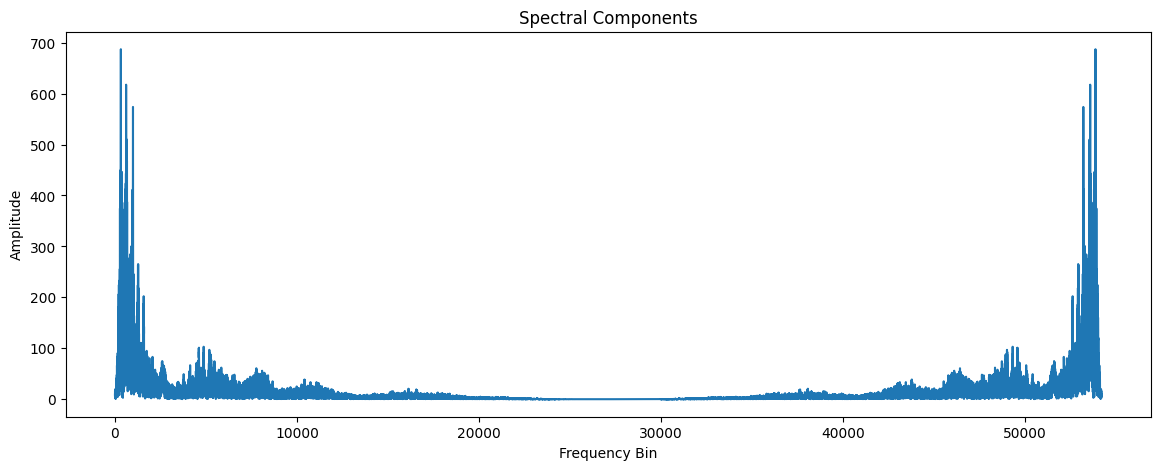

In [11]:
plot_spectral_components(y, sr)

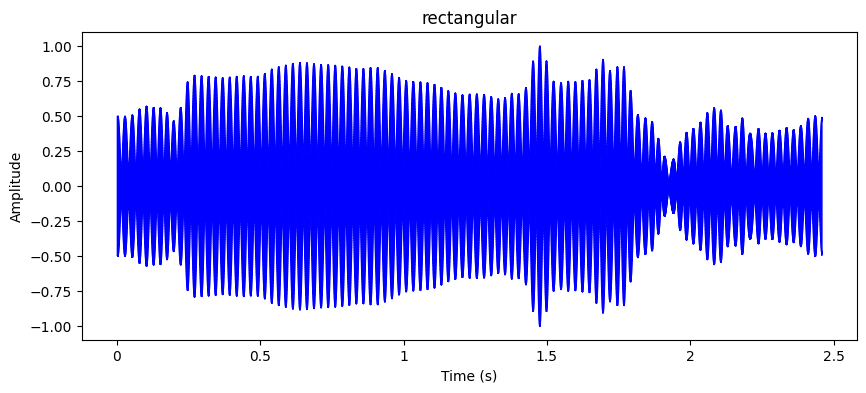

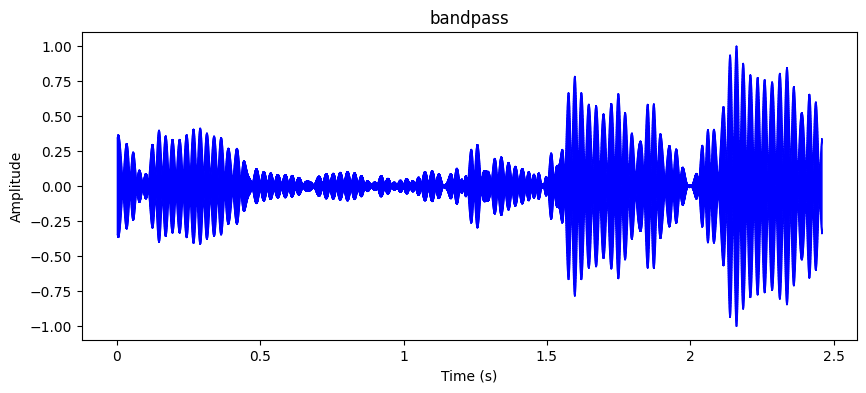

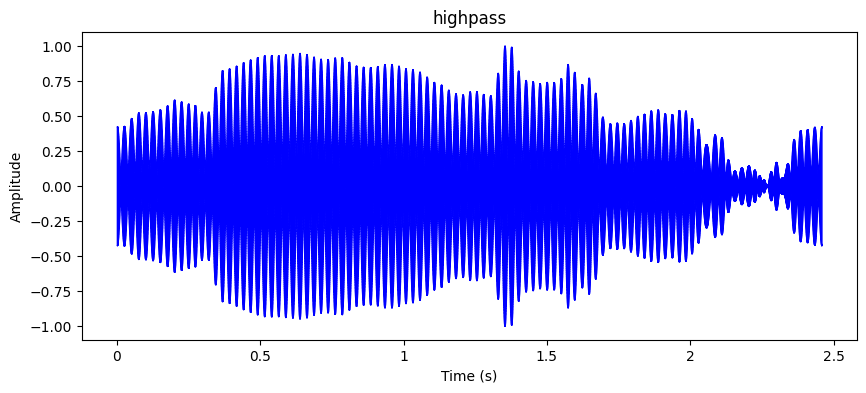

In [12]:
filter_types = ['rectangular', 'bandpass', 'highpass']
for filter_type in filter_types:
    apply_filter_and_listen(y, sr, filter_type)